1. import NYC_Accidents_2020.csv as a DataFrame

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

Header row had to be specified to line number 4 of the csv file to fix the issue

In [ ]:
df = pd.read_csv('../data/raw/NYC_Accidents_2020.csv', header=3)
print(df)

2. display columns and row samples

In [ ]:
print(df.columns)

In [ ]:
print(df.head(5))

In [ ]:
print(df.sample(n=5))

In [ ]:
print(df.tail(5))

3. describe the rows and data types

In [ ]:
df.info()

ON STREET NAME - str
CROSS STREET NAME - str
OFF STREET NAME - str
CONTRIBUTING FACTOR VEHICLE (1-5) - str
VEHICLE TYPE CODE (1-5) - str

removing empty rows and rows with missing data may be necessary to complete this part of the homework


4. initial column (or row) clean-up 

the following columns were removed because they have the highest amount of null (empty) entries. this is shown previously with df.info()

the 'LOCATION' column was renamed to 'COORDINATES' because it is a more specific inidicator of what the data represents

any row with a null street name was removed

In [ ]:
df = df.drop(['CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 5'], axis=1, inplace=True)

In [ ]:
df = df.rename(columns={'LOCATION': 'COORDINATES'})

In [39]:
df.dropna(subset=['ON STREET NAME'], inplace=True)

5. determine the top three streets(Use the ON STREET NAME column) that had the most accidents

group dataframe by street name, then count members of each group

sort each street name group by count in descending order and sleect top 3

In [40]:
accidents_by_street = df.groupby('ON STREET NAME')['ON STREET NAME'].count()
top_streets = accidents_by_street.sort_values(ascending=False)[:3]
print(top_streets)

ON STREET NAME
BELT PARKWAY                  1241
LONG ISLAND EXPRESSWAY         745
BROOKLYN QUEENS EXPRESSWAY     738
Name: ON STREET NAME, dtype: int64


6. show the number of accidents that occurred at each borough

remove any rows with no value recorded for persons injured or persons killed or borough 
replace null values for borough with OTHER

Text(0, 0.5, 'Number of Accidents')

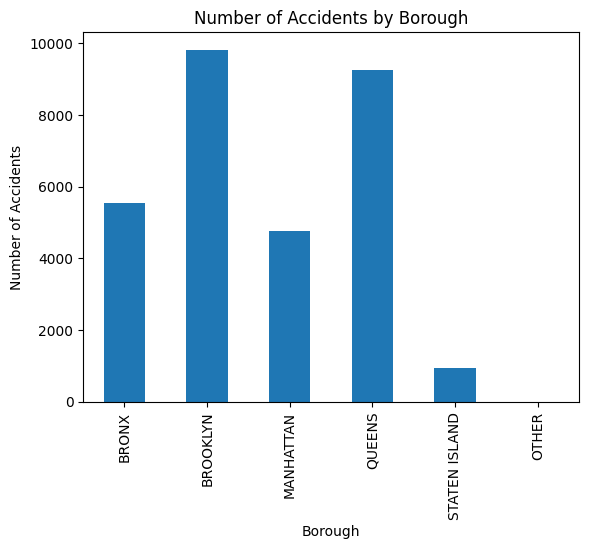

In [60]:
df = df[['BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].dropna()
df['BOROUGH'] = df['BOROUGH'].fillna('OTHER')

accidents_by_borough = df.groupby('BOROUGH')['BOROUGH'].count().reindex(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'OTHER'], fill_value=0)

ax = accidents_by_borough.plot(kind='bar')
ax.set_title('Number of Accidents by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Accidents')


7. calculate summary statistics for the number of persons injured in all NYC and for a couple of selected boroughs (you can choose the two boroughs)

In [61]:
all_injuries_summary = df['NUMBER OF PERSONS INJURED'].describe()
print('Summary statistics for number of persons injured in all NYC:')
print(all_injuries_summary)
print()


manhattan_injuries_summary = df.loc[df['BOROUGH'] == 'MANHATTAN', 'NUMBER OF PERSONS INJURED'].describe()
print('Summary statistics for number of persons injured in Manhattan:')
print(manhattan_injuries_summary)

queens_injuries_summary = df.loc[df['BOROUGH'] == 'BROOKLYN', 'NUMBER OF PERSONS INJURED'].describe()
print('Summary statistics for number of persons injured in brooklyn:')
print(queens_injuries_summary)
print()

Summary statistics for number of persons injured in all NYC:
count    30305.000000
mean         0.416697
std          0.745320
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         15.000000
Name: NUMBER OF PERSONS INJURED, dtype: float64

Summary statistics for number of persons injured in Manhattan:
count    4757.000000
mean        0.341602
std         0.630707
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: NUMBER OF PERSONS INJURED, dtype: float64
Summary statistics for number of persons injured in brooklyn:
count    9823.000000
mean        0.451186
std         0.785893
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        15.000000
Name: NUMBER OF PERSONS INJURED, dtype: float64



8. what are the distributions of accidents based on the geo location (latitude & longitude)?

read data and use only 3 columns of borough, latitude, longitude

drop rows with missing/null vals for latitude or longitude

set up scatter plot

set longitude and latitude limits



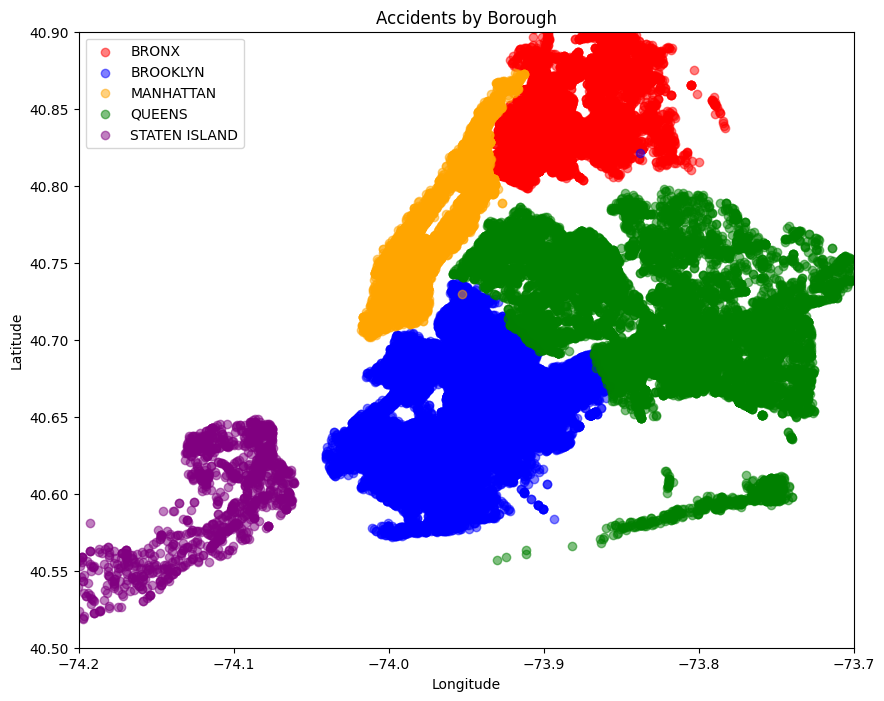

In [72]:
df = pd.read_csv('../data/raw/NYC_Accidents_2020.csv', header=3, usecols=['BOROUGH', 'LATITUDE', 'LONGITUDE'])

df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
groups = df.groupby('BOROUGH')
fig, ax = plt.subplots(figsize=(10, 8))


borough_colors = {
    'BRONX': 'red',
    'BROOKLYN': 'blue',
    'QUEENS': 'green',
    'MANHATTAN': 'orange',
    'STATEN ISLAND': 'purple'
}

for borough, group in df.groupby('BOROUGH'):
    ax.scatter(group['LONGITUDE'], group['LATITUDE'], label=borough, color=borough_colors[borough], alpha=0.5)

ax.set_xlim(-74.2, -73.7)
ax.set_ylim(40.5, 40.9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Accidents by Borough')

ax.legend()
plt.show()

9. shows the covariance between each pair of the columns

covariance was chosen between persons injured and persons killed, motorists killed and motorists injured, pedestrians killed and injured, cyclists killed and injured because these stats are closely related

drop rows with missing values of the columns we're interested in

calculate covariance with new dataframe of only selected columns

In [75]:
df = pd.read_csv('../data/raw/NYC_Accidents_2020.csv', header=3)


cols = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
        'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF MOTORIST INJURED',
        'NUMBER OF MOTORIST KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED']


df = df.dropna(subset=cols)
df_selected = df.loc[:, cols]
cov = df_selected.cov()
print(cov)

                               NUMBER OF PERSONS INJURED  \
NUMBER OF PERSONS INJURED                       0.527334   
NUMBER OF PERSONS KILLED                        0.000617   
NUMBER OF PEDESTRIANS INJURED                   0.042047   
NUMBER OF PEDESTRIANS KILLED                   -0.000047   
NUMBER OF MOTORIST INJURED                      0.454301   
NUMBER OF MOTORIST KILLED                       0.000708   
NUMBER OF CYCLIST INJURED                       0.030986   
NUMBER OF CYCLIST KILLED                       -0.000044   

                               NUMBER OF PERSONS KILLED  \
NUMBER OF PERSONS INJURED                      0.000617   
NUMBER OF PERSONS KILLED                       0.002267   
NUMBER OF PEDESTRIANS INJURED                 -0.000052   
NUMBER OF PEDESTRIANS KILLED                   0.000760   
NUMBER OF MOTORIST INJURED                     0.000740   
NUMBER OF MOTORIST KILLED                      0.001387   
NUMBER OF CYCLIST INJURED                     

10. which month did the most number of accidents occur?

convert CRASH DATE to pandas datetime

use abbreviated month name from CRASH DATE to MONTH

count number of accidents in MONTH

get month with max accidents

In [83]:
df = pd.read_csv('../data/raw/NYC_Accidents_2020.csv', header=3)
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%y')
df['MONTH'] = df['CRASH DATE'].dt.month
df['MONTH'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])

month_counts = df['MONTH'].value_counts()
max_count = month_counts.max()
min_count = month_counts.min()

print("The following month had the most accidents with", max_count, "accidents:")
for month, count in month_counts.items():
    if count == max_count:
        print(month)

print("The following month had the most accidents with", min_count, "accidents:")
for month, count in month_counts.items():
    if count == min_count:
        print(month)

The following month had the most accidents with 14287 accidents:
Jan
The following month had the most accidents with 4116 accidents:
Apr


Conclusion:

accidents reach a lull in April perhaps due to weather conditions becoming more favorable in NYC